# About This Notebook:
- In this notebook we will learn from data mining to Model prediction, an end to end complete project in one notebook.
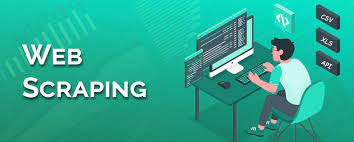
### What you will learn?
    1. How to scrap/gather data from web/html file
    2. How to convert raw data into pandas dataframe and later save in to csv.
    3. Cleaning data.
    4. Feature Engineering
    5. Data Visualization
    6. Feature Scaling
    7. Train Test split
    8. Model Selection
    9. Model Training
    10. Model Prediction
    


# Data Scrapping
- Data scraping is a technique where a computer program extracts data from human-readable output coming from another program.
- Here I used Automated Scrapping technique, used most famous pyhton library called **BeautifulSoup** also known as **bs4**.
## Here, what i did?
- Scrapping data from well known bike website bikewale.com/
- In this webpage, all the bike listed on same page, on clicking 'Load More' button new bike data displaying on same page with old bike and new bike data. So, this difficult to scrape through get request.
- So, What I did?, loaded all the bike data and then downloaded as html file.
- after this step, everything will be same as we do with get request process(technique of getting data from web)

## Actual data/ input data

In [ ]:
filename = r'../input/bike-data-scrapping-from-html-file/Best Bikes in India - April 2022 _ Top 10 Bikes - BikeWale.html'
file = open(filename,"r")
contents = file.read()
contents[:2000] # only displaying 2000 chars of html file

## First, I tried and tested all the steps and then converted into a function.

In [ ]:
# function to extract the data from html file and return dataframe.
# Here I am passing no of bikes data I want, while researching found around 200 data available

def get_Bike_data(x):
    
    from bs4 import BeautifulSoup    
    import pandas as pd
    
    filename = r'../input/bike-data-scrapping-from-html-file/Best Bikes in India - April 2022 _ Top 10 Bikes - BikeWale.html'
    file = open(filename,"r")
    contents = file.read()
    soup = BeautifulSoup(contents, 'lxml')

    bike = []
    x_price = []
    rating_star = []
    reviews = []
    ratings = []

    # this loop running x*2 because it was giving one bike name and then second was blanck and so on
    for i in range(0,x*2): 
        name= soup.select("a.bw-ga")[i].text
        if name != '':
            bike.append(name)
    specs = []
    for i in range(0,x):
       specs.append(soup.find_all("div", class_="text-xt-light-grey font14 margin-bottom15")[i].text)   
#     print(specs)
#     len(specs)

    for i in range(0,x):
        x_price.append(soup.find_all("span", class_="font18")[i].text.replace(",",''))
        rating_star.append(soup.find_all("span", class_="font14 inline-block")[i].text)
        reviews.append(soup.find_all("span", class_="review-left-divider")[i].text)
        ratings.append(soup.select('span.font11.text-xt-light-grey.inline-block.padding-left3')[i].text.replace('\n                                                            \xa0(','').split(' ratings')[0])  

    df = pd.DataFrame(list(zip(bike,specs, x_price,rating_star,ratings,reviews)),
                   columns =['bike', 'specs','x_price','rating_star','ratings','reviews'])
    return df

## Here we got the data in form of dataframe

In [ ]:
df = get_Bike_data(150)
df

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


# Data Cleaning AND Feature Construction
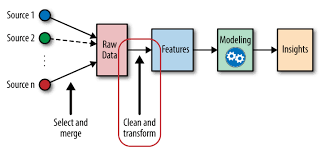

In [ ]:
df['bike'].nunique()

In [ ]:
df['brand']=df['bike'].str.split(' ').str[0]

In [ ]:
df['model']=df['bike'].str.split(' ').str[1:].apply(lambda x : " ".join(x))

In [ ]:
df['ratings'] = df['ratings'].apply(lambda x: int(x) if str(x).isnumeric() else 0)

In [ ]:
df['engine_cc']=df['specs'].str.split(',').apply(lambda a: max([float(i.split()[0]) if 'cc' in i else 0 for i in a]))

In [ ]:
df['engine_bhp']=df['specs'].str.split(',').apply(lambda a: max([float(i.split()[0]) if 'bhp' in i else 0 for i in a]))

In [ ]:
df['kmpl']=df['specs'].str.split(',').apply(lambda a: max([float(i.split()[0]) if 'kmpl' in i else 0 for i in a]))

In [ ]:
df['weight']=df['specs'].str.split(',').apply(lambda a: max([float(i.split()[0]) if 'kg' in i else 0 for i in a]))

In [ ]:
df = df[['brand', 'model', 'engine_cc', 'engine_bhp', 'kmpl', 'weight', 'rating_star', 'ratings', 'reviews', 'x_price']]

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['x_price'] = df['x_price'].astype(int)
df['rating_star'] = df['rating_star'].replace('Not rated yet',0).astype(float)
df['reviews'] = df['reviews'].astype(int)

In [ ]:
df.shape

In [ ]:
df.info()

# Data Analysis
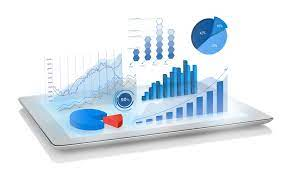

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
df['brand'].value_counts().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(25,7))
for i in range(len(df.columns.tolist()[2:])):
    plt.subplot(2,4,i+1)
    sns.distplot(df[df.columns.tolist()[i+2]])

In [ ]:
# checking skewness of data
for i in range(len(df.columns.tolist()[2:])):
    print(f'Skewness of {df.columns.tolist()[i+2]}: {round(df[df.columns.tolist()[i+2]].skew(),2)}')

In [ ]:
plt.figure(figsize=(25,7))
for i in range(len(df.columns.tolist()[2:])):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[df.columns.tolist()[i+2]])


In [ ]:
px.scatter(df,x='x_price',y='engine_cc',color='brand',size='weight')

In [ ]:
px.scatter(df,x='weight',y='engine_cc',color='brand',title='Bike Weight vs CC')

In [ ]:
px.scatter(df,x='weight',y='engine_bhp',color='brand',title='Bike Weight vs BHP')

In [ ]:
px.scatter(df,x='kmpl',y='engine_cc',color='brand',title='Bike kmpl vs cc')

In [ ]:
sns.scatterplot(df['x_price'],df['weight'],hue=df['brand'],size=df['engine_cc'])
plt.legend('')

# Training Testing Data
- Dropping Brand and model name as most the unique values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,2:-1]
y = df['x_price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Model Selection: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

print('Score: ',lr.score(X_test,y_test))

# print("Intercept: ",lr.intercept_)

# print('Coefficent',lr.coef_)

In [ ]:
sns.distplot(lr_pred,label = 'Actual Result')
sns.distplot(y_test, label= 'Predicred Result')
plt.legend()

# Model 2: ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

In [ ]:
model.feature_importances_

In [ ]:
pd.Series(model.feature_importances_,index=X.columns).plot.bar()
plt.title('Feature Importance')

In [ ]:
import numpy as np

In [ ]:
## hyperparameters
n_estimators = [100*i for i in range(1,13)] # no of trees in RF
max_features = ['auto','sqrt'] # no features to consider at every split
max_depth = [int(x) for x in np.linspace(5,30,num=6)] # max level of tree, [i*5 for i in range(1,7)]
min_samples_split = [2,5,10,15,100] # min no of samples required to split a node
min_samples_leaf = [1,2,5,10] # min no of samples required at each leaf node

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf':min_samples_leaf    
}
print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
xt_pred = rf_random.predict(X_test)

In [ ]:
rf_random.score(X_test,y_test)

In [ ]:
sns.distplot(xt_pred,label = 'Actual Result')
sns.distplot(y_test, label= 'Predicred Result')
plt.legend()

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(lr_pred,label = 'Linear Reg Pred')
sns.distplot(xt_pred,label = 'ExtraTree Pred')
sns.distplot(y_test, label= 'Actual')
plt.legend()
plt.title('Actual and Prediction Comparision')

## here we can see ExtraTree performing better then Linear Regression

#### That's all!!
#### Pls write you feedback or suggestions if any.
#### Pls Upvote.

# Thanks!!!